In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=7b2df5030b949ea78d092f9793d76078b7ca2b04d93e870c8a82ad7100513b4b
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [3]:
#Import the libraries
from pyforest import *

In [6]:
#Read the dataset
df=pd.read_csv("waterquality.csv", sep=',', engine='python')
df

<IPython.core.display.Javascript object>

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [7]:
#To check null values
df.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

In [9]:
#Fill null values with mean
df= df.fillna(df.mean())

In [10]:
#View top 10 rows of data
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [11]:
df.isnull().sum()

STATION CODE           0
LOCATIONS              0
STATE                  0
TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

Plotting a correlation matrix to see the relation between different features

Here positive values mean positively correlated i.e, if one increase then other also increases and vice versa

<IPython.core.display.Javascript object>

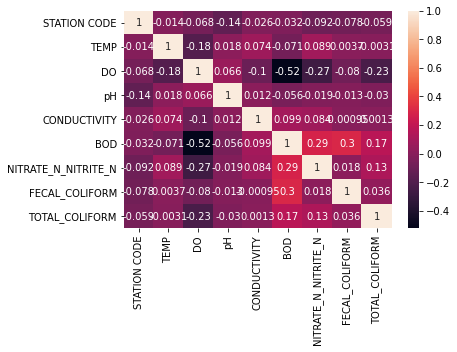

In [12]:
#Correlaton matrix
sns.heatmap(df.corr(),annot=True)

Pairplot of df

In [13]:
#Drop the columns
df= df.drop("STATION CODE", axis=1)

In [14]:
df.head()

,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


<IPython.core.display.Javascript object>

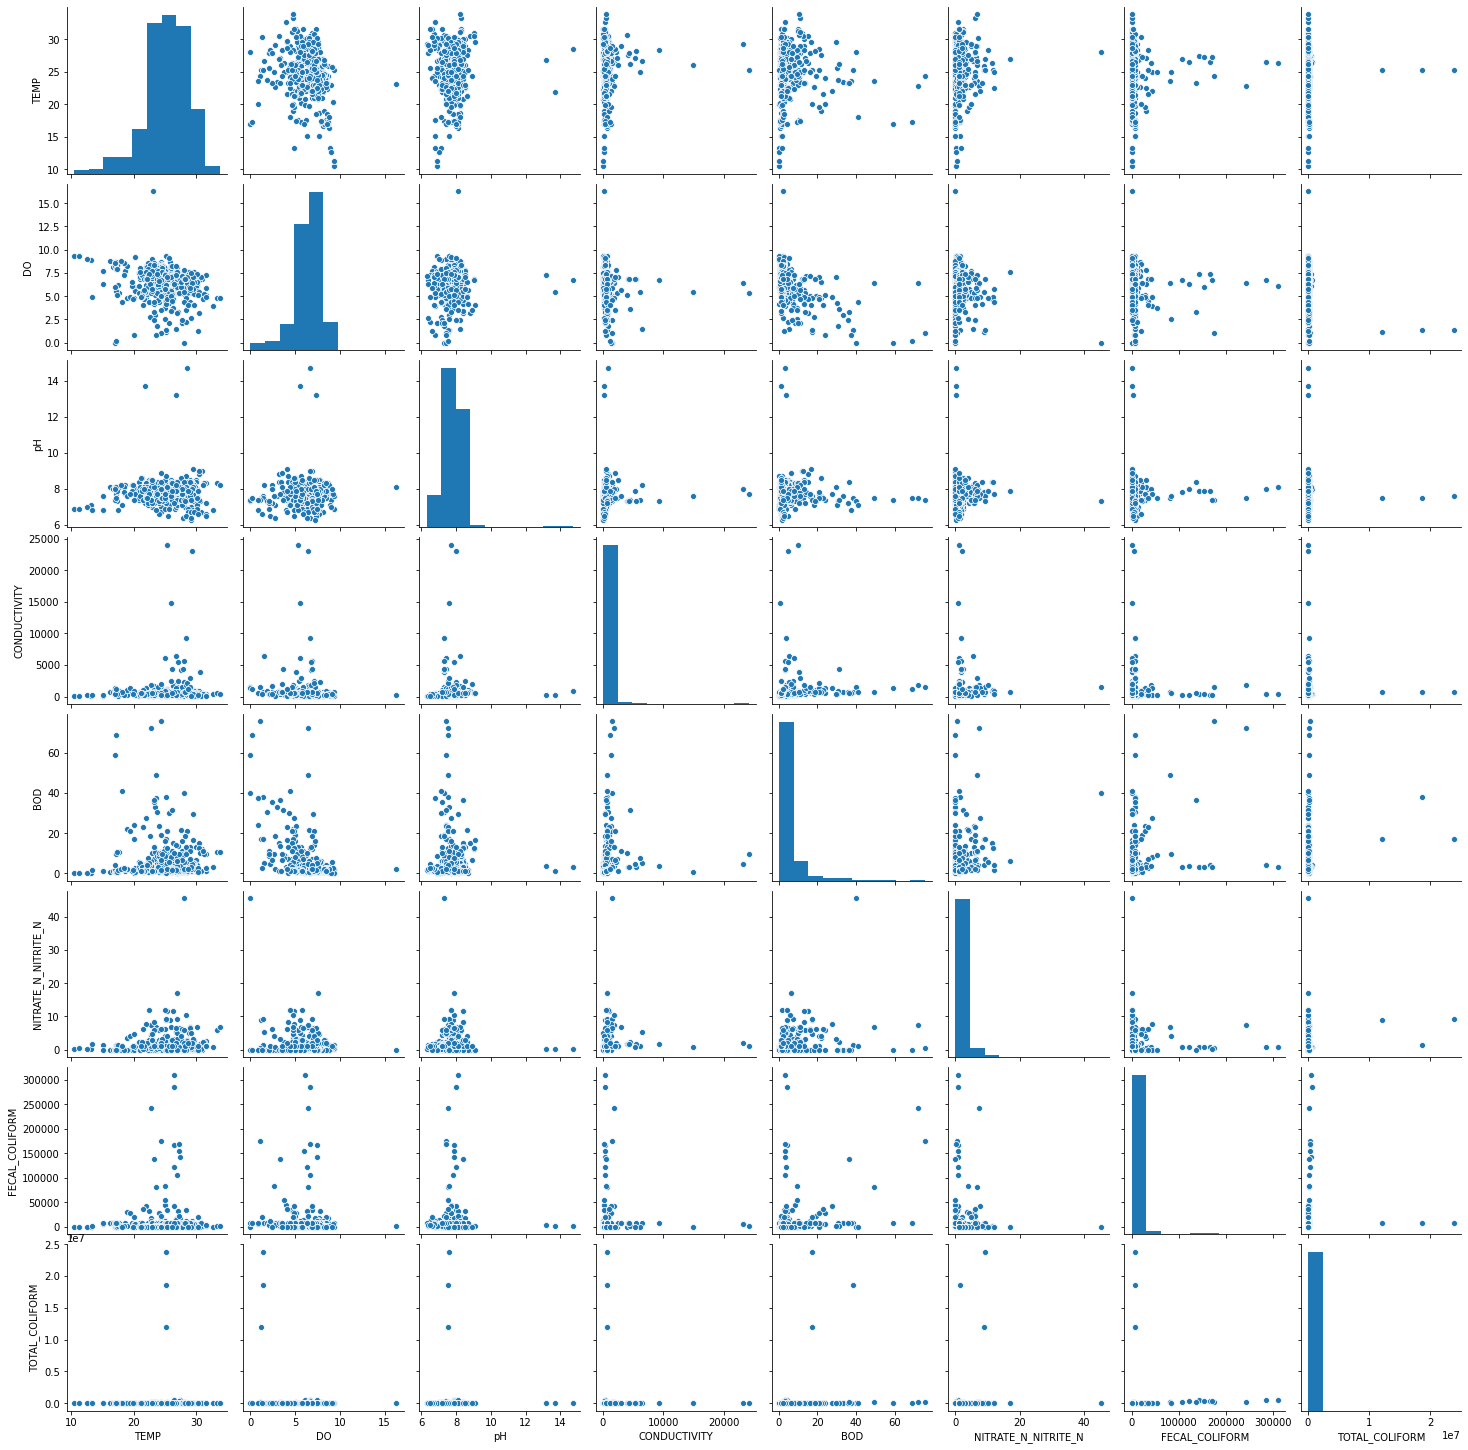

In [15]:
#Visualize using pairplot 
sns.pairplot(df)

# Separating the pH column and using q values for the column separately

## The pH of river water is the measure of how acidic or basic the water is on a scale of 0-14. It is a measure of hydrogen ion concentration.The optimum pH for river water is around 7.4.


In [25]:
ph= df["pH"]
ph.value_counts(10)

7.9     0.112360
8.1     0.101124
8.0     0.099251
8.2     0.080524
7.7     0.073034
7.8     0.069288
7.5     0.067416
7.4     0.061798
7.6     0.054307
7.3     0.041199
8.3     0.037453
8.4     0.033708
7.2     0.028090
7.1     0.020599
7.0     0.016854
6.9     0.016854
6.8     0.014981
8.5     0.014981
6.7     0.013109
6.6     0.005618
6.5     0.005618
8.6     0.005618
6.4     0.005618
8.7     0.003745
9.0     0.003745
14.7    0.001873
9.1     0.001873
6.3     0.001873
8.8     0.001873
13.7    0.001873
8.9     0.001873
13.2    0.001873
Name: pH, dtype: float64

In [20]:
#View as Dataframe
PH= pd.DataFrame(ph, index=None)
PH

<IPython.core.display.Javascript object>

,pH
0,8.1
1,8.0
2,7.8
3,7.8
4,7.9
...,...
529,8.1
530,8.4
531,8.5
532,7.9


In [22]:
#First 5 columns of PH Data
PH.head()

,pH
0,8.1
1,8.0
2,7.8
3,7.8
4,7.9


In [23]:
PH.pH.value_counts()

7.9     60
8.1     54
8.0     53
8.2     43
7.7     39
7.8     37
7.5     36
7.4     33
7.6     29
7.3     22
8.3     20
8.4     18
7.2     15
7.1     11
7.0      9
6.9      9
6.8      8
8.5      8
6.7      7
6.6      3
6.5      3
8.6      3
6.4      3
8.7      2
9.0      2
14.7     1
9.1      1
6.3      1
8.8      1
13.7     1
8.9      1
13.2     1
Name: pH, dtype: int64

generating the q values by using a specific range from the q table

In [28]:
PH["QI"]=PH.replace(to_replace =6.4, value =54)
PH.head()

,pH,QI
0,8.1,8.1
1,8.0,8.0
2,7.8,7.8
3,7.8,7.8
4,7.9,7.9


In [29]:
PH["QI"]=PH["QI"].replace(to_replace =[6.5,6.7,6.8,6.9],  
                            value =75)

PH["QI"]=PH["QI"].replace(to_replace =[7.0,7.1,7.2,7.3,7.4],  
                            value =80)

PH["QI"]=PH["QI"].replace(to_replace =[7.5,7.6,7.7,7.8,7.9],  
                            value =95)

PH["QI"]=PH["QI"].replace(to_replace =[8.0,8.1,8.2,8.3,8.4],  
                            value =85)

PH["QI"]=PH["QI"].replace(to_replace =[8.5,8.6,8.7,8.8,8.9],  
                            value =65)

PH["QI"]=PH["QI"].replace(to_replace =[9.0,9.1,9.2,9.3,9.4],  
                            value =48)

PH["QI"]=PH["QI"].replace(to_replace =[9.5,9.6,9.7,9.8,9.9],  
                            value =30)

PH["QI"]=PH["QI"].replace(to_replace =[10.0,10.1,10.2,10.3,10.4],  
                            value =20)

PH["QI"]=PH["QI"].replace(to_replace =[10.5,10.6,10.7,10.8,10.9],  
                            value =12)

PH["QI"]=PH["QI"].replace(to_replace =[11.0,11.1,11.2,11.3,11.4],  
                            value =8)

PH["QI"]=PH["QI"].replace(to_replace =[11.5,11.6,11.7,11.8,11.9],  
                            value =4)

PH["QI"]=PH["QI"].replace(to_replace =[12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8],  
                            value =75)



In [30]:
PH["QI"].value_counts()

95.0    201
85.0    188
80.0     90
75.0     29
65.0     15
6.6       3
54.0      3
48.0      3
14.7      1
6.3       1
Name: QI, dtype: int64

In [40]:
PH.head(), PH.tail()

(    pH    QI
 0  8.1  85.0
 1  8.0  85.0
 2  7.8  95.0
 3  7.8  95.0
 4  7.9  95.0,       pH    QI
 529  8.1  85.0
 530  8.4  85.0
 531  8.5  65.0
 532  7.9  95.0
 533  8.9  65.0)

<IPython.core.display.Javascript object>

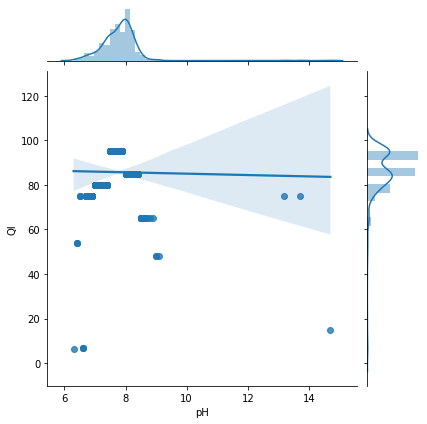

In [41]:
sns.jointplot(x="pH", y="QI", data=PH, kind="reg")

From above we can see that maximum of the river water pH lies b/w 6.5 and 8.5 and QI lies b/w 80 and 100

<IPython.core.display.Javascript object>

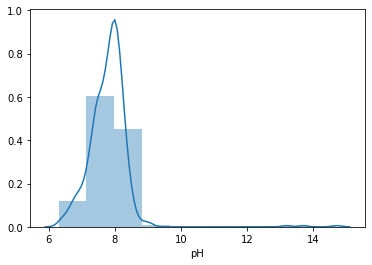

In [47]:
sns.distplot(PH["pH"], kde=True, bins=10)

concatenating qi values from ph with state

In [44]:
ls= df[["LOCATIONS","STATE"]]
ls.head()

,LOCATIONS,STATE
0,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA
1,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA
2,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA
3,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA
4,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA


In [45]:
df_col_merged = pd.concat([ls, PH], axis=1)
df_col_merged.head()

<IPython.core.display.Javascript object>

,LOCATIONS,STATE,pH,QI
0,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,8.1,85.0
1,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,8.0,85.0
2,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,7.8,95.0
3,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,7.8,95.0
4,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,7.9,95.0


A barplot to show the relation of QI and States

<IPython.core.display.Javascript object>

[Text(0, 0, 'MAHARASHTRA'),
 Text(0, 0, 'ANDHRA PRADESH'),
 Text(0, 0, 'UTTARAKHAND'),
 Text(0, 0, 'UTTAR PRADESH'),
 Text(0, 0, 'BIHAR'),
 Text(0, 0, 'WEST BENGAL'),
 Text(0, 0, 'ASSAM'),
 Text(0, 0, 'KARNATAKA'),
 Text(0, 0, 'HIMACHAL PRADESH'),
 Text(0, 0, 'DELHI'),
 Text(0, 0, 'KERALA'),
 Text(0, 0, 'TAMILNADU'),
 Text(0, 0, 'MADHYA PRADESH'),
 Text(0, 0, 'RAJASTHAN'),
 Text(0, 0, 'PUNJAB'),
 Text(0, 0, 'GOA'),
 Text(0, 0, 'CHHATTISGARH'),
 Text(0, 0, 'GUJARAT')]

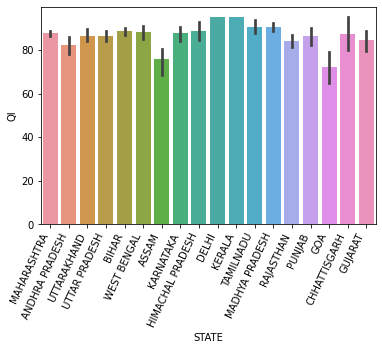

In [46]:
ax=sns.barplot(x="STATE", y= "QI", data=df_col_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

# More work is to be done in the notebook and will update the whole notebook soon

In [48]:
X= df_col_merged.drop(["LOCATIONS","STATE","QI"], axis=1)
X.head()

,pH
0,8.1
1,8.0
2,7.8
3,7.8
4,7.9


In [49]:
X.shape

(534, 1)

In [50]:
y= df_col_merged["pH"]
y.head()

0    8.1
1    8.0
2    7.8
3    7.8
4    7.9
Name: pH, dtype: float64

In [51]:
y.shape

(534,)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((427, 1), (107, 1), (427,), (107,))

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
ridge= Ridge()

In [58]:
parameters= {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,60,70,80,90,100]}

ridge_regressor= GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error", cv=10)

ridge_regressor.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [59]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [60]:
ridge_regressor.best_score_, ridge_regressor.score

(-1.9884145947814044e-31,
 <bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              iid='deprecated', n_jobs=None,
              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 40, 50, 60, 70, 80, 90, 100]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring='neg_mean_squared_error', verbose=0)>)

In [61]:
ridge_regressor.cv_results_

{'mean_fit_time': array([0.00400546, 0.00189235, 0.00187864, 0.00178175, 0.00176902,
        0.00180743, 0.00181782, 0.00186927, 0.00176971, 0.00173788,
        0.00176058, 0.00175121, 0.00180426, 0.00192742, 0.00178049,
        0.00179167, 0.00181751]),
 'mean_score_time': array([0.00104003, 0.00087631, 0.00089557, 0.00085254, 0.00088387,
        0.000862  , 0.00087681, 0.00088155, 0.0008405 , 0.00085394,
        0.00086393, 0.00086467, 0.00086079, 0.00096498, 0.00086946,
        0.00087187, 0.00087395]),
 'mean_test_score': array([-1.98841459e-31, -1.28760575e-25, -1.28808888e-21, -1.28808381e-11,
        -1.28795453e-09, -1.27385313e-05, -3.04798258e-04, -1.15571839e-03,
        -4.17156369e-03, -8.51331113e-03, -1.37913639e-02, -1.97190892e-02,
        -2.60841341e-02, -3.27283603e-02, -3.95336051e-02, -4.64114481e-02,
        -5.32957695e-02]),
 'param_alpha': masked_array(data=[1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                    50, 60, 70, 80, 90, 100],
 

In [63]:
df2= pd.DataFrame(ridge_regressor.cv_results_)
df2

<IPython.core.display.Javascript object>

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004005,0.005802,0.001040,0.000210,1e-15,{'alpha': 1e-15},-5.843414e-31,-5.259073e-31,-0.000000e+00,-0.000000e+00,-8.483976e-31,-2.976834e-32,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-1.988415e-31,3.071349e-31,1
1,0.001892,0.000064,0.000876,0.000034,1e-10,{'alpha': 1e-10},-4.555327e-26,-2.989089e-26,-2.100491e-26,-4.664684e-26,-2.418390e-25,-3.168406e-26,-4.452672e-25,-7.788903e-26,-3.029117e-25,-4.491889e-26,-1.287606e-25,1.404940e-25,2
2,0.001879,0.000059,0.000896,0.000035,1e-08,{'alpha': 1e-08},-4.558853e-22,-2.996930e-22,-2.100977e-22,-4.668229e-22,-2.418865e-21,-3.172788e-22,-4.454209e-21,-7.782106e-22,-3.031148e-21,-4.486774e-22,-1.288089e-21,1.405501e-21,3
3,0.001782,0.000035,0.000853,0.000029,0.001,{'alpha': 0.001},-4.558890e-12,-2.996832e-12,-2.100962e-12,-4.668214e-12,-2.418856e-11,-3.172741e-12,-4.454171e-11,-7.782149e-12,-3.031169e-11,-4.486629e-12,-1.288084e-11,1.405496e-11,4
4,0.001769,0.000046,0.000884,0.000055,0.01,{'alpha': 0.01},-4.558507e-10,-2.996584e-10,-2.100789e-10,-4.667821e-10,-2.418618e-09,-3.172479e-10,-4.453679e-09,-7.781473e-10,-3.030858e-09,-4.486252e-10,-1.287955e-09,1.405341e-09,5
5,0.001807,0.000070,0.000862,0.000019,1,{'alpha': 1},-4.516625e-06,-2.969493e-06,-2.081987e-06,-4.624881e-06,-2.392588e-05,-3.143799e-06,-4.399997e-05,-7.707726e-06,-2.996982e-05,-4.445132e-06,-1.273853e-05,1.388498e-05,6
6,0.001818,0.000041,0.000877,0.000034,5,{'alpha': 5},-1.088288e-04,-7.159229e-05,-5.021323e-05,-1.114321e-04,-5.728953e-04,-7.579477e-05,-1.048173e-03,-1.855046e-04,-7.164334e-04,-1.071154e-04,-3.047983e-04,3.308580e-04,7
7,0.001869,0.000239,0.000882,0.000054,10,{'alpha': 10},-4.160994e-04,-2.739207e-04,-1.922048e-04,-4.260294e-04,-2.174071e-03,-2.900003e-04,-3.953532e-03,-7.082833e-04,-2.713452e-03,-4.095912e-04,-1.155718e-03,1.248324e-03,8
8,0.001770,0.000030,0.000840,0.000027,20,{'alpha': 20},-1.525188e-03,-1.005363e-03,-7.060150e-04,-1.561425e-03,-7.858509e-03,-1.064382e-03,-1.413100e-02,-2.589462e-03,-9.772666e-03,-1.501626e-03,-4.171564e-03,4.464230e-03,9
9,0.001738,0.000021,0.000854,0.000032,30,{'alpha': 30},-3.156168e-03,-2.082978e-03,-1.463858e-03,-3.230847e-03,-1.605648e-02,-2.205263e-03,-2.858164e-02,-5.345837e-03,-1.990208e-02,-3.107965e-03,-8.513311e-03,9.033442e-03,10
